In [1]:
import tensorflow as tf
import numpy as np

/home/rluo/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.InteractiveSession()

In [5]:
a = tf.zeros((2,2))
b = tf.ones((2,2))

In [10]:
tf.reduce_sum(b, reduction_indices = 1).eval()

array([ 2.,  2.], dtype=float32)

In [11]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [12]:
tf.reshape(a, (1, 4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

In [13]:
a.eval()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [14]:
a = tf.constant(1)
b = tf.constant(5)
c = a*b

In [15]:
with tf.Session() as sess:
    print(c.eval())
    print(sess.run(c))

5
5


In [16]:
w = tf.Variable(tf.ones(2,2), name='weights')

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[ 1.  1.]


In [18]:
with tf.Session() as sess:
    print(sess.run(w))

FailedPreconditionError: Attempting to use uninitialized value weights
	 [[Node: weights/_0 = _Send[T=DT_DOUBLE, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_weights", _device="/job:localhost/replica:0/task:0/device:GPU:0"](weights)]]
	 [[Node: weights/_1 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_weights", tensor_type=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [19]:
rw = tf.Variable(tf.random_normal((2,2)), name='random_weights')

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(rw))

[[ 0.40691793  1.74324286]
 [ 0.31745145  0.98051089]]


In [24]:
var_1 = tf.Variable(0, name='var_1')
add_op = tf.add(var_1, tf.constant(1))
upd_op = tf.assign(var_1, add_op)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(upd_op))

1
2
3
4
5


In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run([upd_op for i in range(5)]))

[1, 1, 1, 1, 1]


In [25]:
x = tf.constant(1)
y = tf.constant(5)
z = tf.constant(7)

mul_x_y = x * y
final_op = mul_x_y + z

with tf.Session() as sess:
    print(sess.run([mul_x_y, final_op]))

[5, 12]


In [31]:
a = np.ones((3, 3))
b = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(b))

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [33]:
inp1 = tf.placeholder(tf.float32, shape=(1, 2))
inp2 = tf.placeholder(tf.float32, shape=(2, 1))
output = tf.matmul(inp1, inp2)
with tf.Session() as sess:
    print(sess.run([output], feed_dict = {inp1:[[1, 3]], inp2:[[1], [3]]}))

[array([[ 10.]], dtype=float32)]


In [34]:
inp1 = tf.placeholder(tf.float32, shape=(1, 2))
inp2 = tf.placeholder(tf.float32, shape=(2, 1))
output = tf.matmul(inp1, inp2)
with tf.Session() as sess:
    print(sess.run([output], feed_dict = {inp1:[[1, 3]], inp2:[[1, 3]]}))

ValueError: Cannot feed value of shape (1, 2) for Tensor 'Placeholder_5:0', which has shape '(2, 1)'

# XOR Implementation

In [2]:
x_ = tf.placeholder(tf.float32, shape = [4, 2], name = 'x-input')
y_ = tf.placeholder(tf.float32, shape = [4, 1], name = 'y-input')

In [3]:
w1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), name = 'Weights1')
w2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), name = 'Weights2')
b1 = tf.Variable(tf.zeros([2]), name = 'Bias1')
b2 = tf.Variable(tf.zeros([1]), name = 'Bias2')

In [4]:
z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
pred = tf.sigmoid(tf.matmul(z2, w2) + b2)

In [5]:
cost = tf.reduce_mean(
    ((y_ * tf.log(pred)) + ((1 - y_) * tf.log(1 - pred))) * -1
)
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [6]:
xor_x = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [[0], [1], [1], [0]]

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter('./logs/xor_logs', sess.graph)

In [9]:
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict = {x_: xor_x, y_: xor_y})
    if (i + 1) % 1000 == 0:
        print('iteration {}, cost = {}'.format(i,
            sess.run(cost, feed_dict = {x_: xor_x, y_: xor_y})))
    if (i + 1) % 10000 == 0:
        print('prediction = {}'.format(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})))

iteration 999, cost = 0.693591833114624
iteration 1999, cost = 0.6935060024261475
iteration 2999, cost = 0.6934369802474976
iteration 3999, cost = 0.6933813095092773
iteration 4999, cost = 0.6933360695838928
iteration 5999, cost = 0.6932991147041321
iteration 6999, cost = 0.6932687163352966
iteration 7999, cost = 0.6932436227798462
iteration 8999, cost = 0.6932227611541748
iteration 9999, cost = 0.6932051181793213
prediction = [[0.50009674]
 [0.49594593]
 [0.5044897 ]
 [0.500418  ]]
iteration 10999, cost = 0.6931900978088379
iteration 11999, cost = 0.6931771039962769
iteration 12999, cost = 0.69316565990448
iteration 13999, cost = 0.6931552290916443
iteration 14999, cost = 0.6931456923484802
iteration 15999, cost = 0.6931365728378296
iteration 16999, cost = 0.6931275725364685
iteration 17999, cost = 0.6931185126304626
iteration 18999, cost = 0.6931090950965881
iteration 19999, cost = 0.6930990219116211
prediction = [[0.5001237 ]
 [0.4964543 ]
 [0.50342685]
 [0.4996368 ]]
iteration 2099

In [10]:
print('Final Prediction: {}'.format(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})))

Final Prediction: [[0.03544911]
 [0.96587723]
 [0.956504  ]
 [0.02975076]]


## XOR with Linear Activation

In [44]:
x_ = tf.placeholder(tf.float32, shape = [4, 2], name = 'x-input')
y_ = tf.placeholder(tf.float32, shape = [4, 1], name = 'y-input')

In [45]:
w1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), name = 'Weights1')
w2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), name = 'Weights2')
b1 = tf.Variable(tf.zeros([2]), name = 'Bias1')
b2 = tf.Variable(tf.zeros([1]), name = 'Bias2')

In [46]:
z2 = tf.matmul(x_, w1) + b1
pred = tf.sigmoid(tf.matmul(z2, w2) + b2)

In [47]:
cost = tf.reduce_mean(
    ((y_ * tf.log(pred)) + ((1 - y_) * tf.log(1 - pred))) * -1
)
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [48]:
xor_x = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [[0], [1], [1], [0]]

In [49]:
init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter('./logs/xor_logs', sess.graph)

In [50]:
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict = {x_: xor_x, y_: xor_y})
    if (i + 1) % 1000 == 0:
        print('iteration {}, cost = {}'.format(i,
            sess.run(cost, feed_dict = {x_: xor_x, y_: xor_y})))
    if (i + 1) % 10000 == 0:
        print('prediction = {}'.format(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})))

iteration 999, cost = 0.6979290246963501
iteration 1999, cost = 0.6952173709869385
iteration 2999, cost = 0.6941906213760376
iteration 3999, cost = 0.693717360496521
iteration 4999, cost = 0.693474292755127
iteration 5999, cost = 0.6933410167694092
iteration 6999, cost = 0.6932649612426758
iteration 7999, cost = 0.6932202577590942
iteration 8999, cost = 0.6931934356689453
iteration 9999, cost = 0.6931770443916321
prediction = [[ 0.49420005]
 [ 0.49988702]
 [ 0.49938676]
 [ 0.50507379]]
iteration 10999, cost = 0.6931668519973755
iteration 11999, cost = 0.6931604743003845
iteration 12999, cost = 0.6931562423706055
iteration 13999, cost = 0.6931535601615906
iteration 14999, cost = 0.6931517720222473
iteration 15999, cost = 0.693150520324707
iteration 16999, cost = 0.6931495666503906
iteration 17999, cost = 0.6931489706039429
iteration 18999, cost = 0.6931484937667847
iteration 19999, cost = 0.6931482553482056
prediction = [[ 0.49909127]
 [ 0.49941543]
 [ 0.50049347]
 [ 0.50081766]]
iterat

In [51]:
print('Final Prediction: {}'.format(sess.run(pred, feed_dict = {x_: xor_x, y_: xor_y})))

Final Prediction: [[ 0.5000006 ]
 [ 0.49999881]
 [ 0.50000107]
 [ 0.49999934]]


# MNIST

### Full Batch Gradient Descent

In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
def read_infile():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
    train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X, train_Y, test_X, test_Y

In [4]:
def weights_biases_placeholder(n_dim, n_classes):
    X = tf.placeholder(tf.float32, [None, n_dim]) # None means the dimension is variable
    Y = tf.placeholder(tf.float32, [None, n_classes])
    w = tf.Variable(tf.random_normal([n_dim, n_classes], stddev = 0.01), name = 'weights')
    b = tf.Variable(tf.random_normal([n_classes]), name = 'biases')
    return X, Y, w, b

In [5]:
def forward_pass(w, b, X):
    out = tf.matmul(X, w) + b
    return out

In [6]:
def multiclass_cost(out, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = out, labels = Y))
    return cost

In [7]:
def train_op(learning_rate, cost):
    op_train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return op_train

In [9]:
train_X, train_Y, test_X, test_Y = read_infile()
X, Y, w, b = weights_biases_placeholder(train_X.shape[1], train_Y.shape[1])
out = forward_pass(w, b, X)
cost = multiclass_cost(out, Y)
learning_rate, epochs = 0.01, 1000
op_train = train_op(learning_rate, cost)
init = tf.global_variables_initializer()
loss_trace = []
accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(epochs):
        sess.run(op_train, feed_dict = {X: train_X, Y: train_Y})
        loss_ = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
        accuracy_ = np.mean(
            np.argmax(
                sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
                axis = 1) == np.argmax(train_Y, axis = 1))
        if (((i + 1) >= 100) and ((i + 1) % 100 == 0)):
            print(f'Epoch: {i+1}, loss: {loss_}, accuracy: {accuracy_}')

    print(f'Final training result -- loss: {loss_}, accuracy: {accuracy_}')
    loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
    test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
    accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
    print(f'results on test dataset -- loss: {loss_test}, accuracy: {accuracy_test}')

Epoch: 100, loss: 1.5505201816558838, accuracy: 0.7410363636363636
Epoch: 200, loss: 1.1957453489303589, accuracy: 0.7917272727272727
Epoch: 300, loss: 1.0032517910003662, accuracy: 0.8124727272727272
Epoch: 400, loss: 0.884689211845398, accuracy: 0.826
Epoch: 500, loss: 0.8043515682220459, accuracy: 0.8348181818181818
Epoch: 600, loss: 0.7460952401161194, accuracy: 0.8417272727272728
Epoch: 700, loss: 0.7017210125923157, accuracy: 0.8469454545454546
Epoch: 800, loss: 0.6666526794433594, accuracy: 0.8508727272727272
Epoch: 900, loss: 0.6381392478942871, accuracy: 0.8541818181818182
Epoch: 1000, loss: 0.614426851272583, accuracy: 0.8578181818181818
Final training result -- loss: 0.614426851272583, accuracy: 0.8578181818181818
results on test dataset -- loss: 0.5896153450012207, accuracy: 0.8687


Actual_digits:    [7 2 1 0 4 1 4 9 5 9]
Predicted digits: [7 2 1 0 4 1 4 9 6 9]
Actual images of the digits:


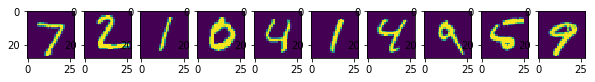

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(1, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:10], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:10]))
print('Actual images of the digits:')
for i in range(10):
    a[i].imshow(np.reshape(test_X[i], (28, 28)))

### StochasticGradient Descent

In [41]:
train_X, train_Y, test_X, test_Y = read_infile()
X, Y, w, b = weights_biases_placeholder(train_X.shape[1], train_Y.shape[1])
out = forward_pass(w, b, X)
cost = multiclass_cost(out, Y)
learning_rate, epochs, batch_size = 0.01, 1000, 1000
num_batches = train_X.shape[0] // batch_size
op_train = train_op(learning_rate, cost)
init = tf.global_variables_initializer()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(init)

for i in range(epochs):
    epoch_cost, epoch_accuracy = 0, 0
    
    for j in range(num_batches):
        sess.run(op_train, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                        Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
        actual_batch_size = train_X[(j*batch_size):((j+1)*batch_size)].shape[0]
        epoch_cost += actual_batch_size * sess.run(
            cost, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                               Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
    
    epoch_cost = epoch_cost/float(train_X.shape[0])
    epoch_accuracy = np.mean(
        np.argmax(
            sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
            axis = 1) == np.argmax(train_Y, axis = 1))
 
    epoch_cost_trace.append(epoch_cost)
    epoch_accuracy_trace.append(epoch_accuracy)
    
    if (((i + 1) >= 100) and ((i + 1) % 100 == 0)):
        print(f'Epoch: {i+1}, Average loss: {epoch_cost}, Accuracy: {epoch_accuracy}')

print(f'Final training result -- Loss: {epoch_cost}, Accuracy: {epoch_accuracy}')
loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
print(f'results on test dataset -- Loss: {loss_test}, Accuracy: {accuracy_test}')

Epoch: 100, Average loss: 1.0595002857121554, Accuracy: 0.6716727272727273


KeyboardInterrupt: 

Actual_digits:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Predicted digits: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual images of the digits:


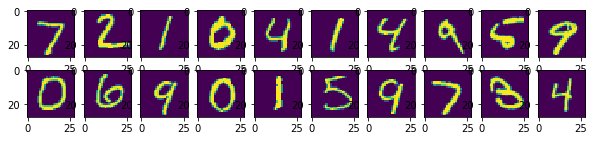

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(2, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:20], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:20]))
print('Actual images of the digits:')
for i in range(2):
    for j in range(10):
        a[i, j].imshow(np.reshape(test_X[i*10 + j], (28, 28)))

### MLP with SGD

In [53]:
def mlp_weights_biases_placeholder(n_dim, n_hidden, n_classes):
    num_layers = len(n_hidden)
    X = tf.placeholder(tf.float32, [None, n_dim]) # None means the dimension is variable
    Y = tf.placeholder(tf.float32, [None, n_classes])
    w = []
    b = []
    w.append(tf.Variable(tf.random_normal([n_dim, n_hidden[0]], stddev = 0.01), name = 'W0'))
    b.append(tf.Variable(tf.random_normal([n_hidden[0]]), name = 'b0'))
    if len(n_hidden) > 1:
        for i in range(1, num_layers):
            w.append(tf.Variable(tf.random_normal([n_hidden[i-1], n_hidden[i]], stddev = 0.01), name = f'W{i}'))
            b.append(tf.Variable(tf.random_normal([n_hidden[i]]), name = f'b{i}'))
    w.append(tf.Variable(tf.random_normal([n_hidden[num_layers - 1], n_classes], stddev = 0.01), name = f'W{num_layers}'))
    b.append(tf.Variable(tf.random_normal([n_classes]), name = f'b{num_layers}'))
    return X, Y, w, b

In [44]:
def mlp_forward_pass(w, b, X):
    assert len(w) == len(b)
    out = X
    for i in range(len(w) - 1):
        out = tf.matmul(out, w[i]) + b[i]
        out = tf.nn.relu(out)
    out = tf.matmul(out, w[len(w) - 1]) + b[len(w) - 1]
    return out

In [36]:
def mlp_train_op(learning_rate, momentum, cost):
    op_train = tf.train.MomentumOptimizer(
        learning_rate = learning_rate, momentum = momentum, use_nesterov = True).minimize(cost)
    return op_train

In [54]:
train_X, train_Y, test_X, test_Y = read_infile()
X, Y, w, b = mlp_weights_biases_placeholder(train_X.shape[1], [64, 16], train_Y.shape[1])
out = mlp_forward_pass(w, b, X)
cost = multiclass_cost(out, Y)
learning_rate, momentum, epochs, batch_size = 0.01, 0.9, 1000, 1000
num_batches = train_X.shape[0] // batch_size
op_train = train_op(learning_rate, cost)
init = tf.global_variables_initializer()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [49]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(init)

for i in range(epochs):
    epoch_cost, epoch_accuracy = 0, 0
    
    for j in range(num_batches):
        sess.run(op_train, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                                        Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
        actual_batch_size = train_X[(j*batch_size):((j+1)*batch_size)].shape[0]
        epoch_cost += actual_batch_size * sess.run(
            cost, feed_dict = {X: train_X[(j*batch_size):((j+1)*batch_size)],
                               Y: train_Y[(j*batch_size):((j+1)*batch_size)]})
    
    epoch_cost = epoch_cost/float(train_X.shape[0])
    epoch_accuracy = np.mean(
        np.argmax(
            sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
            axis = 1) == np.argmax(train_Y, axis = 1))
 
    epoch_cost_trace.append(epoch_cost)
    epoch_accuracy_trace.append(epoch_accuracy)
    
    if (((i + 1) >= 100) and ((i + 1) % 100 == 0)):
        print(f'Epoch: {i+1}, Average loss: {epoch_cost}, Accuracy: {epoch_accuracy}')

print(f'Final training result -- Loss: {epoch_cost}, Accuracy: {epoch_accuracy}')
loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
print(f'results on test dataset -- Loss: {loss_test}, Accuracy: {accuracy_test}')

Epoch: 100, Average loss: 0.9346278515729037, Accuracy: 0.6992
Epoch: 200, Average loss: 0.4651594340801239, Accuracy: 0.8747090909090909
Epoch: 300, Average loss: 0.36895406273278325, Accuracy: 0.9026909090909091
Epoch: 400, Average loss: 0.30005130713636224, Accuracy: 0.9208909090909091
Epoch: 500, Average loss: 0.2533275246620178, Accuracy: 0.9331090909090909
Epoch: 600, Average loss: 0.2182416100393642, Accuracy: 0.9415272727272728
Epoch: 700, Average loss: 0.19000148448077114, Accuracy: 0.9488909090909091
Epoch: 800, Average loss: 0.16687196804718538, Accuracy: 0.9548181818181818
Epoch: 900, Average loss: 0.14837437827478756, Accuracy: 0.9595454545454546
Epoch: 1000, Average loss: 0.13368253789164802, Accuracy: 0.9639636363636364
Final training result -- Loss: 0.13368253789164802, Accuracy: 0.9639636363636364
results on test dataset -- Loss: 0.19711261987686157, Accuracy: 0.9492


Actual_digits:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Predicted digits: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
Actual images of the digits:


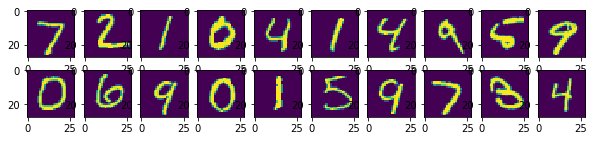

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(2, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:20], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:20]))
print('Actual images of the digits:')
for i in range(2):
    for j in range(10):
        a[i, j].imshow(np.reshape(test_X[i*10 + j], (28, 28)))

In [57]:
train_X, train_Y, test_X, test_Y = read_infile()
X, Y, w, b = mlp_weights_biases_placeholder(train_X.shape[1], [64, 16], train_Y.shape[1])
out = mlp_forward_pass(w, b, X)
cost = multiclass_cost(out, Y)
learning_rate, momentum, epochs, batch_size = 0.1, 0.9, 1000, 10000
num_batches = train_X.shape[0] // batch_size
op_train = train_op(learning_rate, cost)
init = tf.global_variables_initializer()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [58]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(init)

for i in range(epochs):
    epoch_cost, epoch_accuracy = 0, 0
    
    for j in range(num_batches):
        random_indices = np.random.choice(len(train_X), batch_size)
        sess.run(op_train, feed_dict = {X: train_X[random_indices],
                                        Y: train_Y[random_indices]})
        actual_batch_size = train_X[random_indices].shape[0]
        epoch_cost += actual_batch_size * sess.run(
            cost, feed_dict = {X: train_X[random_indices],
                               Y: train_Y[random_indices]})
    
    epoch_cost = epoch_cost/float(train_X.shape[0])
    epoch_accuracy = np.mean(
        np.argmax(
            sess.run(out, feed_dict = {X: train_X, Y: train_Y}),
            axis = 1) == np.argmax(train_Y, axis = 1))
 
    epoch_cost_trace.append(epoch_cost)
    epoch_accuracy_trace.append(epoch_accuracy)
    
    if (((i + 1) >= 100) and ((i + 1) % 100 == 0)):
        print(f'Epoch: {i+1}, Average loss: {epoch_cost}, Accuracy: {epoch_accuracy}')

print(f'Final training result -- Loss: {epoch_cost}, Accuracy: {epoch_accuracy}')
loss_test = sess.run(cost, feed_dict = {X: test_X, Y: test_Y})
test_pred = np.argmax(sess.run(out, feed_dict = {X: test_X, Y: test_Y}), axis = 1)
accuracy_test = np.mean(test_pred == np.argmax(test_Y, axis = 1))
print(f'results on test dataset -- Loss: {loss_test}, Accuracy: {accuracy_test}')

Epoch: 100, Average loss: 1.1296258189461448, Accuracy: 0.5331272727272727
Epoch: 200, Average loss: 0.4272515448656949, Accuracy: 0.8602545454545455
Epoch: 300, Average loss: 0.27284927801652387, Accuracy: 0.9129090909090909
Epoch: 400, Average loss: 0.20051648941907016, Accuracy: 0.9364
Epoch: 500, Average loss: 0.16822529651901938, Accuracy: 0.9486
Epoch: 600, Average loss: 0.1373655227097598, Accuracy: 0.9563818181818182
Epoch: 700, Average loss: 0.11985001509839838, Accuracy: 0.9622545454545455
Epoch: 800, Average loss: 0.10060184381224892, Accuracy: 0.9668545454545454
Epoch: 900, Average loss: 0.0906530659307133, Accuracy: 0.9704
Epoch: 1000, Average loss: 0.08500663258812645, Accuracy: 0.9733636363636363
Final training result -- Loss: 0.08500663258812645, Accuracy: 0.9733636363636363
results on test dataset -- Loss: 0.12394347786903381, Accuracy: 0.9622


Actual_digits:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Predicted digits: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual images of the digits:


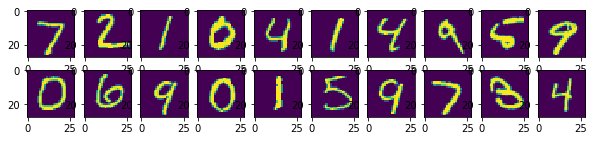

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
f, a = plt.subplots(2, 10, figsize = (10, 2))
print('Actual_digits:    {}'.format(np.argmax(test_Y[0:20], axis = 1)))
print('Predicted digits: {}'.format(test_pred[0:20]))
print('Actual images of the digits:')
for i in range(2):
    for j in range(10):
        a[i, j].imshow(np.reshape(test_X[i*10 + j], (28, 28)))

# Autoencoder for MNIST

In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

/home/rluo/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def read_infile():
    mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
    train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
    return train_X, train_Y, test_X, test_Y

In [4]:
def en_dec_weights(n_in, n_hidden, n_out, en_dec = 'en'):
    all_layers = [n_in] + n_hidden + [n_out]
    num_layers = len(all_layers)
    X = tf.placeholder(tf.float32, [None, n_in])
    w = []
    b = []
    for i in range(1, num_layers):
        w.append(tf.Variable(tf.random_normal([all_layers[i-1], all_layers[i]]),
                             name = f'W_{en_dec}_{i}'))
        b.append(tf.Variable(tf.random_normal([all_layers[i]]), name = f'b_{en_dec}_{i}'))
    return X, w, b

In [5]:
def encoder_forward_pass(w, b, X):
    assert len(w) == len(b)
    out = X
    for i in range(len(w)):
        out = tf.matmul(out, w[i]) + b[i]
        out = tf.nn.sigmoid(out)
    return out

In [6]:
def decoder_forward_pass(w, b, X):
    assert len(w) == len(b)
    out = X
    for i in range(len(w)):
        out = tf.matmul(out, w[i]) + b[i]
        out = tf.nn.sigmoid(out)
    return out

In [7]:
def ae_cost(out, X):
    cost = tf.losses.mean_squared_error(X, out)
    # cost = tf.reduce_mean(tf.pow(X - out, 2))
    return cost

In [8]:
def ae_train_op(learning_rate, cost):
    op_train = tf.train.AdamOptimizer(
        learning_rate = learning_rate).minimize(cost)
    return op_train

In [9]:
train_X, train_Y, test_X, test_Y = read_infile()
X, w_en, b_en = en_dec_weights(train_X.shape[1], [256, 128, 64, 16, 4, 2], 2, en_dec = 'en')
_, w_dec, b_dec = en_dec_weights(2, [4, 16, 64, 128, 256], train_X.shape[1], en_dec = 'dec')

mid = encoder_forward_pass(w_en, b_en, X)
out = decoder_forward_pass(w_dec, b_dec, mid)

# beta = 5e-9

cost = ae_cost(out, X)
# regularizer = tf.reduce_sum([tf.nn.l2_loss(wgt) for wgt in w_en + w_dec])
# cost = cost + beta * regularizer

learning_rate, momentum, epochs, batch_size = 0.005, 0.9, 10000, 100
num_batches = 100

op_train = ae_train_op(learning_rate, cost)

init = tf.global_variables_initializer()
epoch_cost_trace = []
epoch_accuracy_trace = []

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
sess = tf.Session()
sess.run(init)

Epoch: 100, Average loss: 0.012897650558840144
sample_of_images:
Actual vs reconstructed images of the digits:


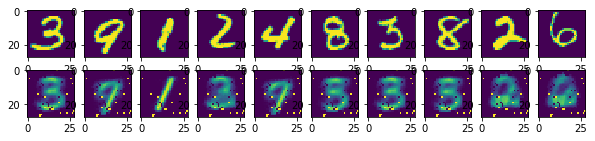

Epoch: 200, Average loss: 0.012154483246532354
sample_of_images:
Actual vs reconstructed images of the digits:


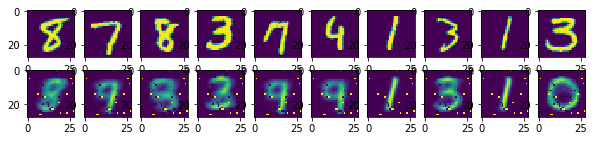

Epoch: 300, Average loss: 0.011961555521596562
sample_of_images:
Actual vs reconstructed images of the digits:


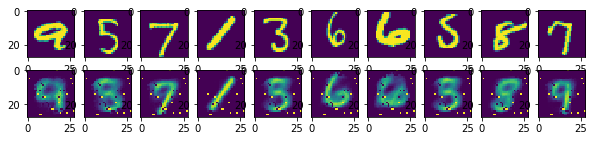

Epoch: 400, Average loss: 0.011808646409349009
sample_of_images:
Actual vs reconstructed images of the digits:


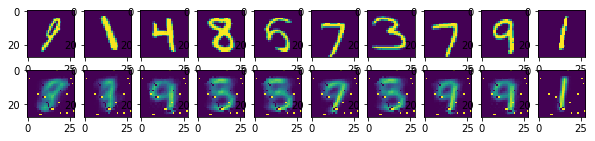

KeyboardInterrupt: 

In [11]:

for i in range(epochs):
    epoch_cost, epoch_accuracy = 0, 0
    
    for j in range(num_batches):
        random_indices = np.random.choice(len(train_X), batch_size)
        sess.run(op_train, feed_dict = {X: train_X[random_indices]})
        actual_batch_size = train_X[random_indices].shape[0]
        epoch_cost += actual_batch_size * sess.run(
            cost, feed_dict = {X: train_X[random_indices]})
    
    epoch_cost = epoch_cost/float(train_X.shape[0])
 
    epoch_cost_trace.append(epoch_cost)
    
    if (((i + 1) >= 100) and ((i + 1) % 100 == 0)):
        print(f'Epoch: {i+1}, Average loss: {epoch_cost}')

        print('sample_of_images:')

        %matplotlib inline
        f, a = plt.subplots(2, 10, figsize = (10, 2))
        test_rand_indices = np.random.choice(len(test_X), 10)
        actual = test_X[test_rand_indices]
        reconstruct = sess.run(out, feed_dict = {X: test_X[test_rand_indices]})
        print('Actual vs reconstructed images of the digits:')
        for j in range(10):
            a[0, j].imshow(np.reshape(actual[j], (28, 28)))
        for j in range(10):
            a[1, j].imshow(np.reshape(reconstruct[j], (28, 28)))
        plt.show()
    
        if (((i + 1) >= 1000) and ((i + 1) % 1000 == 0)):
            mid_test = sess.run(mid, feed_dict=  {X: test_X})
            label_test = np.argmax(test_Y, axis=1)
            colors = plt.cm.rainbow(np.linspace(0, 1, 10))
            x, y = mid_test[:, 0], mid_test[:, 1]
            %matplotlib inline
            plt.scatter(x, y, color = colors[label_test], alpha=0.1)
            plt.show()
    

print(f'Final training result -- Loss: {epoch_cost}')
loss_test = sess.run(cost, feed_dict = {X: test_X})
print(f'results on test dataset -- Loss: {loss_test}')

In [12]:
mid_test = sess.run(mid, feed_dict=  {X: test_X})
mid_test.shape

y_actual = test_Y

In [13]:
label_test = np.argmax(y_actual, axis=1)
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [6.07843137e-02, 6.36474236e-01, 9.41089253e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [3.86274510e-01, 9.84086337e-01, 7.67362681e-01, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 6.36474236e-01, 3.38158275e-01, 1.00000000e+00],
       [1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

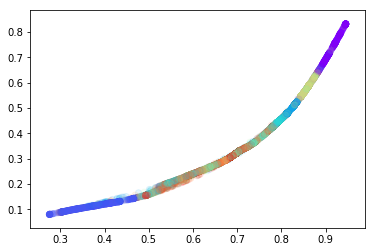

In [14]:
x, y = mid_test[:, 0], mid_test[:, 1]
%matplotlib inline
plt.scatter(x, y, color = colors[label_test], alpha=0.1)

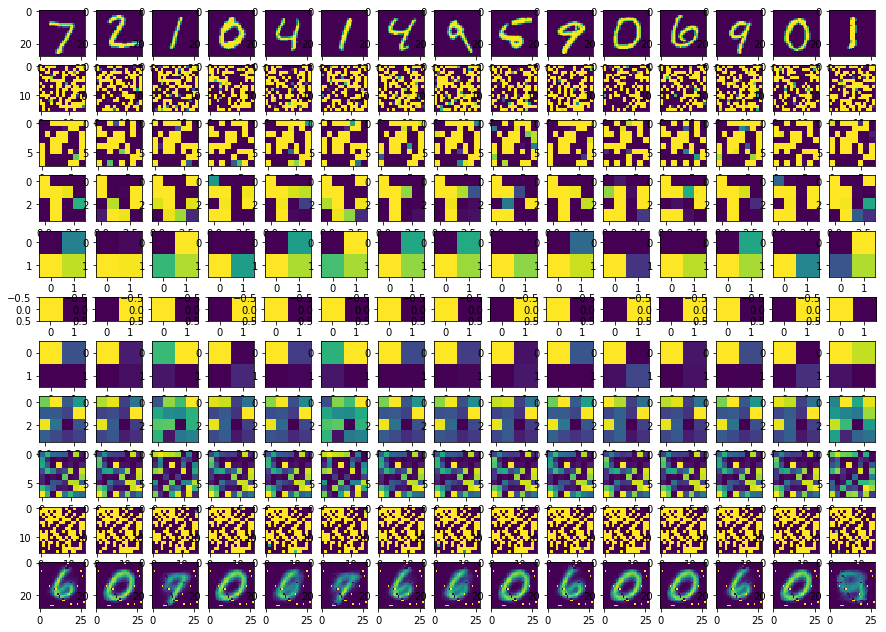

In [18]:
%matplotlib inline

ncol = 15
sample = test_X[0:ncol]
hid1 = sess.run(tf.nn.sigmoid(tf.matmul(sample, w_en[0]) + b_en[0]))
hid2 = sess.run(tf.nn.sigmoid(tf.matmul(hid1, w_en[1]) + b_en[1]))
hid3 = sess.run(tf.nn.sigmoid(tf.matmul(hid2, w_en[2]) + b_en[2]))
hid4 = sess.run(tf.nn.sigmoid(tf.matmul(hid3, w_en[3]) + b_en[3]))
hid5 = sess.run(tf.nn.sigmoid(tf.matmul(hid4, w_en[4]) + b_en[4]))
hid6 = sess.run(tf.nn.sigmoid(tf.matmul(hid5, w_en[5]) + b_en[5]))
hid7 = sess.run(tf.nn.sigmoid(tf.matmul(hid6, w_dec[0]) + b_dec[0]))
hid8 = sess.run(tf.nn.sigmoid(tf.matmul(hid7, w_dec[1]) + b_dec[1]))
hid9 = sess.run(tf.nn.sigmoid(tf.matmul(hid8, w_dec[2]) + b_dec[2]))
hid10 = sess.run(tf.nn.sigmoid(tf.matmul(hid9, w_dec[3]) + b_dec[3]))
hid11 = sess.run(tf.nn.sigmoid(tf.matmul(hid10, w_dec[4]) + b_dec[4]))
out = sess.run(tf.nn.sigmoid(tf.matmul(hid11, w_dec[5]) + b_dec[5]))
nrow = 11
f, a = plt.subplots(nrow, ncol, figsize = (ncol, nrow))
for j in range(ncol):
    a[0, j].imshow(np.reshape(sample[j], (28, 28)))
    a[1, j].imshow(np.reshape(hid1[j], (16, 16)))
    a[2, j].imshow(np.reshape(hid3[j], (8, 8)))
    a[3, j].imshow(np.reshape(hid4[j], (4, 4)))
    a[4, j].imshow(np.reshape(hid5[j], (2, 2)))
    a[5, j].imshow(np.reshape(hid6[j], (1, 2)))
    a[6, j].imshow(np.reshape(hid7[j], (2, 2)))
    a[7, j].imshow(np.reshape(hid8[j], (4, 4)))
    a[8, j].imshow(np.reshape(hid9[j], (8, 8)))
    a[9, j].imshow(np.reshape(hid11[j], (16, 16)))
    a[10, j].imshow(np.reshape(out[j], (28, 28)))

TypeError: Fetch argument array([[2.4287599e-06, 1.6771233e-08, 1.9042196e-06, ..., 4.3352284e-06,
        1.1145807e-08, 9.2168190e-10],
       [1.3024624e-07, 1.4962520e-08, 8.0421478e-06, ..., 2.1887747e-06,
        2.4243283e-09, 2.7313767e-09],
       [1.0614893e-06, 2.4761758e-07, 1.3934496e-07, ..., 1.4269818e-05,
        1.1939873e-05, 5.6676104e-08],
       ...,
       [7.9253152e-07, 8.5925640e-09, 1.8573752e-06, ..., 5.3679842e-06,
        5.0464450e-09, 3.9238440e-10],
       [1.3833088e-07, 1.3671376e-08, 4.8991437e-06, ..., 1.9688712e-06,
        2.6005822e-09, 2.9743064e-09],
       [7.7779873e-07, 7.6885726e-07, 3.0626234e-06, ..., 1.3258912e-05,
        1.1889680e-06, 4.1591661e-10]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

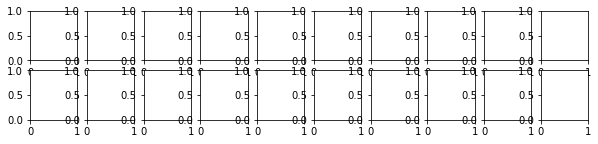

In [19]:
%matplotlib inline

f, a = plt.subplots(2, 10, figsize = (10, 2))
actual = test_X[0:10]
reconstruct = sess.run(out, feed_dict = {X: test_X[0:10]})
print('Actual vs reconstructed images of the digits:')
for j in range(10):
    a[0, j].imshow(np.reshape(actual[j], (28, 28)))
for j in range(10):
    a[1, j].imshow(np.reshape(reconstruct[j], (28, 28)))